# Classifier Metropolis Hastings

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

Shows you how to use Metropolis Hastings MCMC for inference problems.

## Poisson

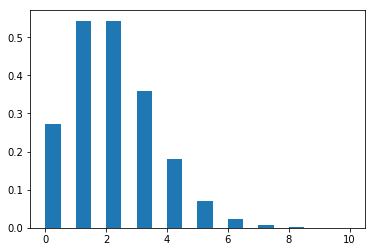

In [2]:
from cag.benchmark.poisson import allocate_observations

# Sample the (true) observations.
theta_true, x_o = allocate_observations(2.)

plt.hist(x_o.numpy(), bins=20, density=True)
plt.show()

In [3]:
from cag.benchmark.poisson import PoissonSimulator as Simulator

simulator = Simulator()

In [4]:
from cag.transition import UniformTransitionDistribution

transition = UniformTransitionDistribution(-5, 5)

In [5]:
classifier = torch.nn.Sequential(
    torch.nn.Linear(1, 50),
    torch.nn.PReLU(),
    torch.nn.Linear(50, 50),
    torch.nn.PReLU(),
    torch.nn.Linear(50, 50),
    torch.nn.PReLU(),
    torch.nn.Linear(50, 50),
    torch.nn.PReLU(),
    torch.nn.Linear(50, 1),
    torch.nn.Sigmoid()
)

In [6]:
from cag.inference import ClassifierMetropolisHastings

cmh = ClassifierMetropolisHastings(simulator, classifier, transition)

In [7]:
initializer = torch.distributions.uniform.Uniform(-5, 5)

cmh.infer(x_o, initializer, 1000)

AttributeError: 'ClassifierMetropolisHastings' object has no attribute '_likelihood_ratio'

## Normal

In [ ]:
from torch.distributions.normal import Normal

mu = 0
sigma = 1
normal = Normal(torch.tensor(mu).float(), torch.tensor(sigma).float())
def likelihood(theta):
    return normal.log_prob(theta).exp()

In [ ]:
from cag.sampling.transition import UniformTransitionDistribution

min = torch.tensor(-10).float()
max = torch.tensor(10).float()
transition = UniformTransitionDistribution(min, max)

In [ ]:
from cag.sampling import MetropolisHastings

mcmc = MetropolisHastings(likelihood, transition)

In [ ]:
from torch.distributions.uniform import Uniform

initializer = Uniform(min, max)
num_samples = 100000
samples = mcmc.sample(initializer, num_samples).squeeze()

In [ ]:
plt.hist(samples.numpy(), bins=25, density=True, label="Sampled")
x = np.linspace(float(min), float(max), 1000)
plt.plot(x, mlab.normpdf(x, float(mu), float(sigma)), lw=2, c='black', label="Truth")
plt.legend()
plt.show()